In [181]:
### NLP_Project_8_2nd_Hotel_review_Pred_TFIDF

In [182]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [183]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [184]:
spam_emails = pd.read_csv('/content/drive/My Drive/NLP/spam_emails.csv',encoding='latin-1')
spam_emails.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [185]:
# Only taking message and label columns for processing
email_eda = spam_emails.copy()
email_eda.drop(columns=['subject'],axis=1,inplace=True)

In [186]:
email_eda.head()

,message,label
0,content - length : 3386 apple-iss research cen...,0
1,"lang classification grimes , joseph e . and ba...",0
2,i am posting this inquiry for sergei atamas ( ...,0
3,a colleague and i are researching the differin...,0
4,earlier this morning i was on the phone with a...,0


In [187]:
print ('Shape = >',email_eda.shape)

Shape = > (2893, 2)


In [188]:
#Label coding 0 and 1
email_eda['label'].replace({0:'ham',1:'spam'},inplace=True)

In [189]:
print ('ham and spam counts','\n',email_eda.label.value_counts())

ham and spam counts 
 ham     2412
spam     481
Name: label, dtype: int64


*Note: Above we can clearly see that target value(label) are imballanced*

In [190]:
#Ratio
print ('spam ratio = ', round(len(email_eda[email_eda['label']=='spam']) / len(email_eda.label),2)*100,'%')
print ('ham ratio  = ', round(len(email_eda[email_eda['label']=='ham']) / len(email_eda.label),2)*100,'%')

spam ratio =  17.0 %
ham ratio  =  83.0 %


In [191]:
#New column for Length of message
email_eda['length'] = email_eda.message.str.len()
email_eda.head(4)

,message,label,length
0,content - length : 3386 apple-iss research cen...,ham,2856
1,"lang classification grimes , joseph e . and ba...",ham,1800
2,i am posting this inquiry for sergei atamas ( ...,ham,1435
3,a colleague and i are researching the differin...,ham,324


In [192]:
# Convert all messages to lower case
email_eda['message'] = email_eda['message'].str.lower()

In [193]:
email_eda.head()

,message,label,length
0,content - length : 3386 apple-iss research cen...,ham,2856
1,"lang classification grimes , joseph e . and ba...",ham,1800
2,i am posting this inquiry for sergei atamas ( ...,ham,1435
3,a colleague and i are researching the differin...,ham,324
4,earlier this morning i was on the phone with a...,ham,1046


In [194]:
#Label coding 0 and 1
email_eda['label'].replace({'ham':0,'spam':1},inplace=True)

In [195]:
email_eda.head(50)

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046
5,content - length : 4437 call for papers is the...,0,4492
6,m . a . in scandinavian linguistics at the uni...,0,2201
7,call for papers linguistics session - - midwes...,0,802
8,content - length : 1937 greetings ! i ' m wond...,0,1230
9,fulbright announcement : please post / dissemi...,0,1478


In [196]:
email_eda['message'][38]

'note : we do not wish to send e-mail to anyone that does not want it so please send an e-mail to : remove929 @ yahoo . com you will be removed promptly . * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * " the internet success toolbox " the most complete marketing software package available anywhere ! this is what you will receive on cd-rom : 1 . stealth mass mailer ( $ 399 . 00 value ) - this unique , first of it \'s kind - software that allows you to easily send 250 , 000 e-mail messages an hour . simply enough by making a single connection to the internet using a standard modem , and connecting to either 20 different mail servers , or a single mail server 20 times . this , easy to use , software is designed for the basic computer user to understand . it \'s as easy as imputing the mail server , selecting the list of e-mail recipients to send to , inserting your e-mail address , adding your subject line 

# Text Cleaning 

**Regular Expressions**

In [197]:
# Replace email addresses with 'email'
email_eda['message'] = email_eda['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')
# Replace URLs with 'webaddress'
email_eda['message'] = email_eda['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')
# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
email_eda['message'] = email_eda['message'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
email_eda['message'] = email_eda['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')   
# Replace numbers with 'numbr'
email_eda['message'] = email_eda['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [198]:
email_eda['message'][0]

"content - length : numbr apple-iss research center a us dollers numbr million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokeni

In [199]:
# Remove punctuation
email_eda['message'] = email_eda['message'].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
email_eda['message'] = email_eda['message'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
email_eda['message'] = email_eda['message'].str.replace(r'^\s+|\s+?$', '')

In [200]:
email_eda['message'][0]

'content length numbr apple iss research center a us dollers numbr million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowledge of acoustic phonetics and or speec

In [201]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
email_eda['message'] = email_eda['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [202]:
email_eda['message'][0]

'content length numbr apple iss research center us dollers numbr million joint venture apple computer inc institute systems science national university singapore located singapore looking senior speech scientist successful candidate research expertise computational linguistics including natural language processing english chinese statistical language modeling knowledge state art corpus based n gram language models cache language models part speech language models required text speech project leader successful candidate research expertise expertise two following areas computational linguistics including natural language parsing lexical database design statistical language modeling text tokenization normalization prosodic analysis substantial knowledge phonology syntax semantics chinese required knowledge acoustic phonetics speech signal processing desirable candidates phd least numbr numbr years relevant work experience technical msc degree least numbr numbr years experienc e strong sof

In [203]:
# New column (clean_length) after puncuations,stopwords removal
email_cleaned = email_eda.copy()
email_cleaned['clean_length'] = email_cleaned.message.str.len()
email_cleaned.head()

,message,label,length,clean_length
0,content length numbr apple iss research center...,0,2856,2179
1,lang classification grimes joseph e barbara f ...,0,1800,1454
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,629


In [204]:
# Total length removal
print ('Before Cleaning Length', email_cleaned.length.sum())
print ('After Cleaning Length', email_cleaned.clean_length.sum())

Before Cleaning Length 9344743
After Cleaning Length 6767857


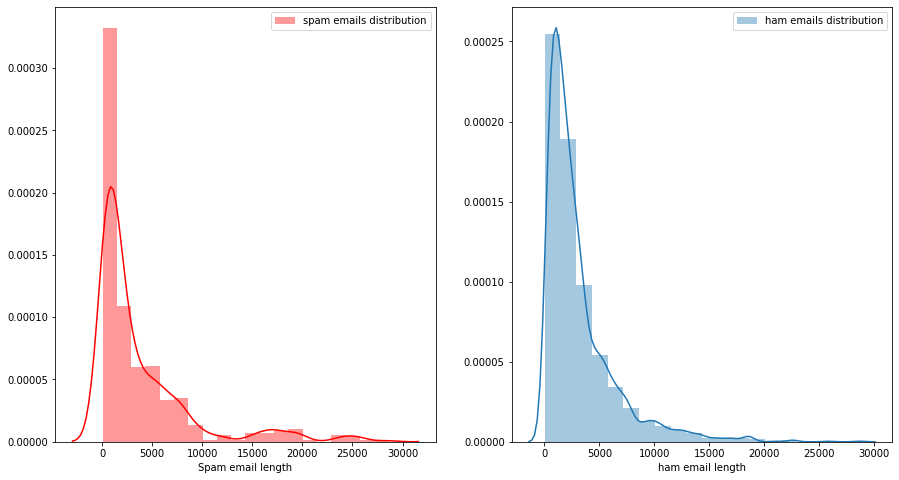

In [205]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email_cleaned[email_cleaned['label']==1]['length'],bins=20,ax=ax[0],label='spam emails distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(email_cleaned[email_cleaned['label']==0]['length'],bins=20,ax=ax[1],label='ham emails distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

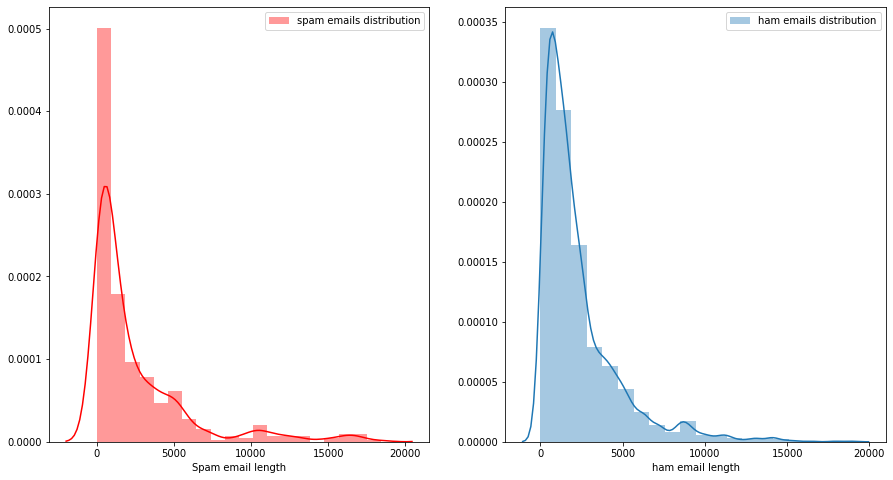

In [206]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(1,2,figsize = (15,8))

sns.distplot(email_cleaned[email_cleaned['label']==1]['clean_length'],bins=20,ax=ax[0],label='spam emails distribution',color='r')

ax[0].set_xlabel('Spam email length')
ax[0].legend()

sns.distplot(email_cleaned[email_cleaned['label']==0]['clean_length'],bins=20,ax=ax[1],label='ham emails distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

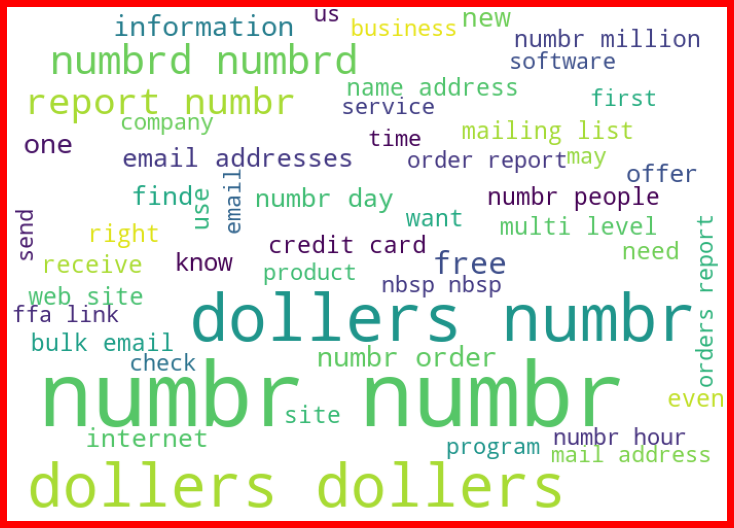

In [207]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud

spams = email_cleaned['message'][email_cleaned['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

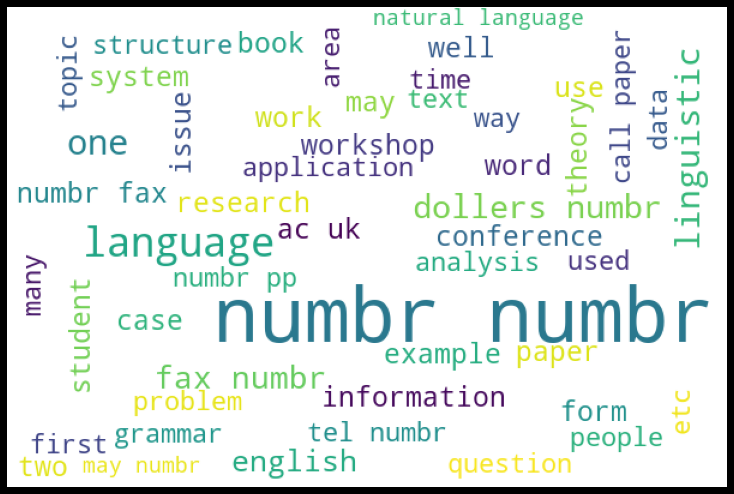

In [208]:
#Getting sense of loud words in ham 

hams = email_cleaned['message'][email_cleaned['label']==0]
spam_cloud = WordCloud(width=600,height=400,background_color='white',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**After Cleaning Now Convert Corpus in BOW (Docuents Matrix wrt Words)**

1. Convert text into vectors using TF-IDF


In [209]:

from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
features_TFIDF = tf_vec.fit_transform(email_cleaned['message'])

**Split data into DV & IV**

In [210]:
X = features_TFIDF
Y = email_cleaned['label']

# Modeling

In [211]:
# Implement MultinomialNB Classifier
from sklearn.naive_bayes import MultinomialNB
NB_model = MultinomialNB() 

In [212]:
# Implement RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,criterion='entropy')

**Split data using    train_test_split**

In [213]:
#The parameter 'shuffle' is set to true, thus the data set will be randomly shuffled before the split. The parameter 'stratify' is recently added to Sci-kit Learn from v0.17 , it is essential when dealing with imbalanced data sets, such as the spam classification example. It makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to the parameter stratify.
#For example, if the variable y is a binary categorical variable with values 0 and 1 and there are 10% of zeros and 90% of ones, stratify=y will make sure that your random split has 10% of 0's and 90% of 1's.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=42,shuffle = True,stratify = Y)

**Train The Model**

In [214]:
NB_model.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [215]:
RF_model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [216]:
!pip install xgboost

In [217]:
from xgboost import XGBClassifier
#lf = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)
XGB_model = XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.1)
XGB_model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

**Model Prediction**

In [218]:
#y_pred= NB_model.predict(X_test)
#y_pred= RF_model.predict(X_test)
y_pred= XGB_model.predict(X_test)

# Evaluate The Model 

**Accuracy**

In [219]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#print ('Final score = > ', accuracy_score(Y_test,y_pred))   ## testing Accuracy

print("NB Training Accuracy:",NB_model.score(X_train,Y_train))
print("NB Testing Accuracy:",NB_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("RF Training Accuracy:",RF_model.score(X_train,Y_train))
print("RF Testing Accuracy:",RF_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")
print("XGB Training Accuracy:",XGB_model.score(X_train,Y_train))
print("XBG Testing Accuracy:",XGB_model.score(X_test,Y_test))
print("--------------------------------------------------------------------")

NB Training Accuracy: 0.8764407561088059
NB Testing Accuracy: 0.856353591160221
--------------------------------------------------------------------
RF Training Accuracy: 1.0
RF Testing Accuracy: 0.9709944751381215
--------------------------------------------------------------------
XGB Training Accuracy: 1.0
XBG Testing Accuracy: 0.9917127071823204
--------------------------------------------------------------------


**Evaluation Matrix** 

[[604   0]
 [104  16]]


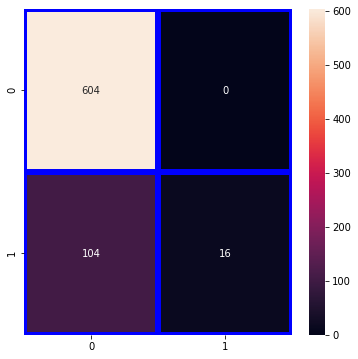

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       604
           1       1.00      0.13      0.24       120

    accuracy                           0.86       724
   macro avg       0.93      0.57      0.58       724
weighted avg       0.88      0.86      0.81       724



In [220]:
Ya = Y_test  # Real Value
Yp = NB_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_NB = confusion_matrix(Ya,Yp)
print(cm_NB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_NB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[604   0]
 [ 21  99]]


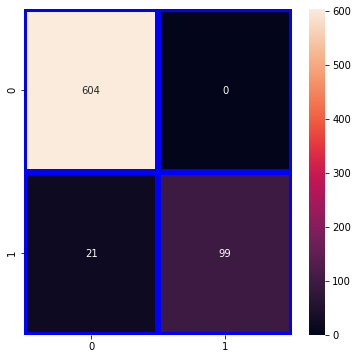

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       604
           1       1.00      0.82      0.90       120

    accuracy                           0.97       724
   macro avg       0.98      0.91      0.94       724
weighted avg       0.97      0.97      0.97       724



In [221]:
Ya = Y_test  # Real Value
Yp = RF_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_RF = confusion_matrix(Ya,Yp)
print(cm_RF)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_RF,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[603   1]
 [  5 115]]


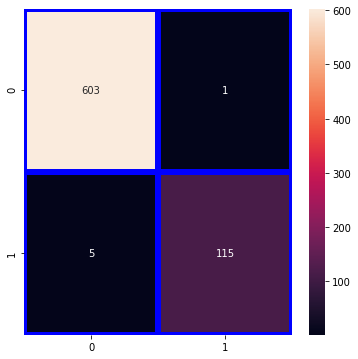

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       604
           1       0.99      0.96      0.97       120

    accuracy                           0.99       724
   macro avg       0.99      0.98      0.98       724
weighted avg       0.99      0.99      0.99       724



In [222]:
Ya = Y_test  # Real Value
Yp = XGB_model.predict(X_test) 

from sklearn.metrics import confusion_matrix
cm_XGB = confusion_matrix(Ya,Yp)
print(cm_XGB)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_XGB,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

**Use K-Fold Cross Validation**

In [223]:
# from sklearn.model_selection import cross_val_score
# print(cross_val_score(NB_model, X, Y, cv=5))

In [224]:
# import numpy as np
# print(np.mean(cross_val_score(NB_model, X, Y, cv=70)))

# Test your Model by giving test data at your own

In [226]:
# ham:0  , spam:1
tests=['I really like it', 
       'I do not think this is good one', 
       'this is good one',
       'I hate the Your Personality!',
      'apply today, win a nokia!!',
      'Thank you for having our service',
      'watch latest shows on netflix for free!!'
      'Pls Share your mobile number and OTP and get free movie bouchers!'
      'note wish send e mail anyone want please send e mail removenumbr yahoo com removed promptly internet success toolbox complete marketing software package available anywhere receive cd rom numbr stealth mass mailer dollers numbr numbr value unique first kind software allows easily send numbr numbr e mail messages hour simply enough making single connection internet using standard modem connecting either numbr different mail servers single mail server numbr times easy use software designed basic computer user understand easy imputing mail server selecting list e mail recipients send inserting e mail address adding subject line selecting sales letter pressing send numbr e mail pro extractor dollers numbr numbr value one kind software program designed manage clean list e mail addresses purge duplicates manage removes delete undeliverables also separate categorize list e mail addresses domain names e mail pro version numbr numbr bulk e mail loader also imports simple text files anyone downlods']
for test in tests:
    result = XGB_model.predict(tf_vec.transform([test.lower()]))
    print(test," : ",result)

I really like it  :  [0]
I do not think this is good one  :  [0]
this is good one  :  [0]
I hate the Your Personality!  :  [0]
apply today, win a nokia!!  :  [0]
Thank you for having our service  :  [0]
watch latest shows on netflix for free!!Pls Share your mobile number and OTP and get free movie bouchers!note wish send e mail anyone want please send e mail removenumbr yahoo com removed promptly internet success toolbox complete marketing software package available anywhere receive cd rom numbr stealth mass mailer dollers numbr numbr value unique first kind software allows easily send numbr numbr e mail messages hour simply enough making single connection internet using standard modem connecting either numbr different mail servers single mail server numbr times easy use software designed basic computer user understand easy imputing mail server selecting list e mail recipients send inserting e mail address adding subject line selecting sales letter pressing send numbr e mail pro extrac